# TODO
1. coco image 읽기 ok
2. coco ann 읽기 ok 
3. ann visualize ok
4. ann['segmentation']의미 알기

In [29]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np

In [30]:
ann = [{'segmentation': [[192.81, 247.09, 199.36, 242.5, 205.92, 235.95, 214.44, 231.36, 226.24, 228.73, 235.42, 230.04, 241.97, 233.32, 245.91, 227.42, 252.46, 224.8, 262.95, 238.57, 267.54, 245.78, 264.92, 251.68, 265.58, 256.27, 257.71, 245.78, 250.5, 230.7, 248.53, 238.57, 243.94, 243.16, 234.11, 247.09, 226.9, 249.06, 227.55, 254.3, 224.27, 258.23, 219.03, 254.3, 219.03, 249.06]], 'area': 1035.749000000001, 'iscrowd': 0, 'image_id': 1268, 'bbox': [192.81, 224.8, 74.73, 33.43], 'category_id': 16, 'id': 42986}, {'segmentation': [[264.31, 131.24, 263.81, 140.27, 181.67, 141.44, 124.77, 141.78, 125.77, 135.25, 126.78, 130.9, 128.95, 126.22, 143, 125.22, 149.53, 128.56, 148.86, 130.24, 213.1, 130.74, 216.44, 126.55, 237.52, 124.71, 237.52, 128.4, 263.95, 130.07]], 'area': 1711.8113999999998, 'iscrowd': 0, 'image_id': 1268, 'bbox': [124.77, 124.71, 139.54, 17.07], 'category_id': 9, 'id': 176790}, {'segmentation': [[3.34, 142.03, 0, 140.27, 0.17, 134.99, 0.52, 134.64, 6.15, 133.93, 11.43, 133.23, 18.83, 133.93, 25.17, 133.93, 38.19, 134.28, 41.71, 135.69, 52.63, 131.82, 59.32, 131.82, 64.25, 133.58, 75.51, 132.88, 81.15, 132.88, 81.85, 130.76, 85.02, 129.71, 91.71, 130.76, 104.38, 132.52, 104.73, 132.52, 105.09, 141.68, 105.44, 142.38, 91.71, 144.85, 3.69, 144.49]], 'area': 1200.53475, 'iscrowd': 0, 'image_id': 1268, 'bbox': [0, 129.71, 105.44, 15.14], 'category_id': 9, 'id': 180486}, {'segmentation': [[27.17, 236.45, 23.98, 254.53, 23.27, 263.39, 23.27, 269.77, 24.34, 275.79, 27.17, 278.98, 28.94, 281.47, 33.91, 282.18, 39.93, 281.82, 48.09, 280.4, 51.28, 278.63, 55.88, 276.15, 62.97, 270.83, 66.87, 268.35, 64.04, 280.4, 63.68, 282.53, 66.16, 282.88, 69.35, 281.82, 70.06, 279.34, 72.54, 273.31, 73.96, 267.64, 76.09, 262.68, 76.44, 258.43, 76.8, 254.88, 72.19, 253.46, 72.19, 252.05, 72.19, 248.5, 73.25, 246.73, 71.83, 244.25, 68.64, 241.06, 65.1, 239.29, 59.43, 239.64, 57.3, 237.51, 54.82, 235.74, 55.17, 233.61, 56.59, 231.13, 56.24, 222.63, 56.24, 219.44, 53.4, 214.83, 50.57, 214.12, 47.02, 213.41, 42.77, 213.77, 39.58, 215.54, 38.16, 218.73, 37.45, 221.56, 38.16, 225.11, 39.58, 227.94, 40.29, 229.72, 40.64, 231.13, 39.22, 231.13, 34.97, 232.2, 31.07, 232.55, 27.17, 235.39]], 'area': 2447.09275, 'iscrowd': 0, 'image_id': 1268, 'bbox': [23.27, 213.41, 53.53, 69.47], 'category_id': 1, 'id': 196726}, {'segmentation': [[501.68, 418.5, 513.17, 380.2, 583.06, 394.56, 594.54, 334.24, 590.72, 283.5, 584.01, 235.63, 579.23, 203.08, 577.31, 198.29, 578.27, 193.51, 567.74, 182.02, 559.12, 155.21, 558.16, 140.85, 562.95, 121.7, 567.74, 112.13, 566.78, 105.43, 566.78, 105.43, 561.99, 89.15, 568.7, 77.66, 587.84, 79.58, 608.91, 88.19, 619.44, 101.6, 624.22, 127.45, 620.39, 149.47, 618.48, 167.66, 621.35, 185.85, 630.93, 194.46, 637.63, 201.17, 640, 207.87, 636.67, 279.67, 626.14, 295.95, 620.39, 322.76, 627.1, 352.43, 634.76, 377.33, 638.59, 400.3, 640, 421.37, 503.59, 421.37, 503.59, 417.54], [562.95, 232.76, 520.83, 285.42, 511.25, 271.06, 505.51, 233.72, 503.59, 193.51, 512.21, 176.27, 524.65, 176.27, 531.36, 186.8, 532.31, 205, 532.31, 219.36, 528.48, 232.76, 539.97, 216.48, 542.85, 206.91, 548.59, 205, 550.5, 203.08, 546.67, 199.25, 550.5, 196.38, 556.25, 196.38, 568.7, 189.68, 553.38, 176.27, 560.08, 176.27, 569.65, 184.89, 572.52, 190.63, 571.57, 194.46, 571.57, 197.34, 563.91, 204.04, 563.91, 208.82, 563.91, 230.84, 563.91, 234.67]], 'area': 23491.405950000004, 'iscrowd': 0, 'image_id': 1268, 'bbox': [501.68, 77.66, 138.32, 343.71], 'category_id': 1, 'id': 197038}, {'segmentation': [[426.36, 222.68, 426.96, 215.5, 429.35, 208.31, 432.35, 206.51, 436.24, 205.02, 440.13, 205.02, 443.73, 207.41, 445.52, 210.41, 446.12, 212.8, 446.12, 216.1, 445.52, 217.29, 446.42, 219.99, 444.92, 223.28, 443.61, 225.3, 446.33, 225.66, 448.88, 226.2, 451.97, 229.11, 453.61, 231.84, 454.88, 235.48, 455.42, 240.2, 456.7, 245.66, 457.42, 248.93, 458.33, 254.75, 459.42, 259.84, 459.06, 261.29, 461.6, 262.56, 463.79, 270.02, 465.24, 274.2, 467.6, 291.65, 454.88, 292.74, 452.7, 286.56, 451.97, 282.2, 451.61, 280.93, 448.7, 284.56, 445.61, 288.93, 441.97, 291.11, 439.06, 293.47, 408.7, 292.93, 406.88, 290.38, 403.79, 287.65, 402.88, 281.29, 402.34, 276.56, 402.34, 274.02, 403.43, 270.02, 406.88, 264.75, 408.52, 259.84, 408.16, 251.66, 408.16, 245.84, 405.61, 245.66, 406.16, 243.29, 408.7, 234.93, 411.79, 228.02, 413.43, 226.57, 417.79, 224.39, 421.61, 223.48, 424.34, 223.3]], 'area': 3894.582600000002, 'iscrowd': 0, 'image_id': 1268, 'bbox': [402.34, 205.02, 65.26, 88.45], 'category_id': 1, 'id': 215218}, {'segmentation': [[0, 209.18, 20.15, 213.02, 23.03, 235.09, 24.95, 255.24, 21.11, 276.35, 18.23, 289.78, 1.92, 284.99]], 'area': 1627.8723499999994, 'iscrowd': 0, 'image_id': 1268, 'bbox': [0, 209.18, 24.95, 80.6], 'category_id': 1, 'id': 216145}, {'segmentation': [[534.08, 181.25, 555.79, 180.52, 556.97, 181.11, 558.59, 195.58, 555.79, 195.43, 550.32, 192.18, 547.52, 191, 541.91, 190.26, 538.8, 191.3, 539.84, 193.51, 544.42, 196.17, 547.22, 197.05, 547.96, 198.68, 536.88, 199.27, 536.29, 198.09, 533.64, 197.5, 530.54, 198.68, 529.21, 197.35, 528.91, 189.97, 530.09, 187.6, 531.27, 186.13, 531.86, 184.8, 532.16, 184.06]], 'area': 394.6889500000005, 'iscrowd': 0, 'image_id': 1268, 'bbox': [528.91, 180.52, 29.68, 18.75], 'category_id': 77, 'id': 325826}, {'segmentation': [[44.36, 232.82, 35.83, 254.23, 37.16, 280.57, 29.2, 282.85, 25.03, 277.54, 21.81, 265.6, 26.55, 237.74, 32.23, 232.25, 41.9, 231.3]], 'area': 667.0871499999998, 'iscrowd': 0, 'image_id': 1268, 'bbox': [21.81, 231.3, 22.55, 51.55], 'category_id': 27, 'id': 1168599}, {'segmentation': [[589.48, 305.75, 595.54, 319.96, 594.78, 337.77, 591.18, 363.73, 586.64, 388.93, 583.04, 396.13, 575.65, 396.32, 550.83, 392.53, 532.07, 387.03, 529.61, 412.8, 529.04, 425.3, 526.01, 424.74, 524.68, 414.13, 525.63, 392.72, 523.73, 382.3, 509.52, 375.85, 492.47, 363.73, 495.31, 355.39, 501.94, 327.73, 513.31, 314.85, 526.95, 290.97, 529.99, 283.59, 535.67, 279.99, 537.56, 278.28, 540.78, 266.34, 544.76, 262.55, 547.04, 260.28, 545.71, 269.94, 541.54, 283.02, 548.74, 290.03, 549.69, 296.85, 557.27, 301.58, 565.98, 301.02, 568.26, 297.04, 572.05, 294.01, 570.15, 278.66, 568.45, 254.41, 565.6, 231.86, 559.16, 201.17, 561.06, 200.22, 562.57, 200.22, 563.9, 200.22, 569.58, 197.95, 573.18, 200.22, 578.68, 207.8, 578.68, 219.17, 582.28, 245.88, 585.5, 285.48, 585.5, 302.15]], 'area': 10016.210149999997, 'iscrowd': 0, 'image_id': 1268, 'bbox': [492.47, 197.95, 103.07, 227.35], 'category_id': 31, 'id': 1177525}, {'segmentation': [[395.04, 143.48, 293.69, 141.85, 291.52, 132.1, 309.95, 128.84, 309.4, 86.03, 312.66, 128.84, 352.53, 128.33, 351.98, 121.35, 381.21, 121.9, 387.64, 128.33, 403.63, 127.78, 413.19, 134.03]], 'area': 1862.3643999999997, 'iscrowd': 0, 'image_id': 1268, 'bbox': [291.52, 86.03, 121.67, 57.45], 'category_id': 9, 'id': 1802627}]

In [42]:
def showAnns(anns):
        """
        Display the specified annotations.
        :param anns (array of object): annotations to display
        :return: None
        """
        if len(anns) == 0:
            return 0
        if 'segmentation' in anns[0] or 'keypoints' in anns[0]:
            datasetType = 'instances'
        elif 'caption' in anns[0]:
            datasetType = 'captions'
        else:
            raise Exception('datasetType not supported')
            
        if datasetType == 'instances':
            ax = plt.gca()
            ax.set_autoscale_on(False)
            polygons = []
            color = []
            for ann in anns:
                c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
                if 'segmentation' in ann:
                    if type(ann['segmentation']) == list:
                        # polygon
                        for seg in ann['segmentation']:     #! occlusion 있으면 instance polygon이 2개가 될 수 있음
                            poly = np.array(seg).reshape((int(len(seg)/2), 2))
                            # print(poly)
                            polygons.append(Polygon(poly))
                            color.append(c)
                    else:
                        print('ann[segmentation] is not a list!! check one more time!!')

                # if draw_bbox:
                #     [bbox_x, bbox_y, bbox_w, bbox_h] = ann['bbox']
                #     poly = [[bbox_x, bbox_y], [bbox_x, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y]]
                #     np_poly = np.array(poly).reshape((4,2))
                #     polygons.append(Polygon(np_poly))
                #     color.append(c)
            p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
            ax.add_collection(p)
            p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
            ax.add_collection(p)

## COCO Instance Segmentation Target

coco detection target format은 다음과 같음

하나의 bbox는 dictionary로 표현, 하나의 Image에 대한 target은 bbox dict의 list로 표현

        Img1 Target = [{bbox1}, {bbox2}, ... , {bboxn}]

하나의 bbox에는 다음과 같은 정보들이 담겨 있다

        segmentation, area, iscrowd, image_id, bbox, category_id, id

여기서 segmentation을 가지고 instance seg target 만들기 가능

segmentation에는 instance polygon에 대한 정보가 담겨 있다. 이 정보를 사용해 polygon을 그리면 됨

        ann['segmentation'] = [10.1, 20.0, 89.1, 76.8, 46.0, 27.1]
        seg = ann['segmentation']
        poly = np.array(seg).reshape((int(len(seg)/2), 2))


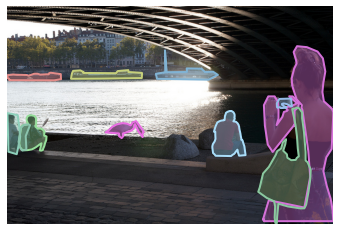

In [46]:
# show image & annotation
pil_img = Image.open('image.png')
img = np.asarray(pil_img)
plt.imshow(pil_img)
plt.axis('off')
showAnns(ann)